In [1]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7',	'#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040',	'#9ABB59', '#9ECCB3'

In [2]:
import pandas as pd

In [3]:
# Importando a base de dados com o PIB dos estados brasileiros de 2002 a 2020
df_pib = pd.read_csv("pib_br_2002_2020_estados.csv")
df_pib

,ano,sigla_uf,regiao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,RO,Norte,7467629886,839731192,6627898698,715526872,1191090432,2484579193,2236702207
1,2003,RO,Norte,9425010486,1108434936,8316575548,1278658831,1216605061,3376727040,2444584625
2,2004,RO,Norte,11004641436,1288806654,9715834778,1288515348,1674933817,3986529419,2765856199
3,2005,RO,Norte,12511821181,1476144194,11035676990,1342222120,1887932121,4603783904,3201738843
4,2006,RO,Norte,13054713344,1613809974,11440903374,1238006193,2210692147,4320526746,3671678293
...,...,...,...,...,...,...,...,...,...,...
508,2016,DF,Centro-Oeste,235540044811,29145619376,206394425435,820754661,9662357225,103859865830,92051447720
509,2017,DF,Centro-Oeste,244722249337,29120461647,215601787690,828313642,8448768236,108322119432,98002586380
510,2018,DF,Centro-Oeste,254817204692,28692287369,226124917323,1022690641,9541298290,113768086938,101792841454
511,2019,DF,Centro-Oeste,273613711477,30686607647,242927103829,992393584,9453608031,125261853488,107219248727


In [4]:
# Verificando os tipos de dados e se existem dados nulos
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ano                513 non-null    int64 
 1   sigla_uf           513 non-null    object
 2   regiao             513 non-null    object
 3   pib                513 non-null    int64 
 4   impostos_liquidos  513 non-null    int64 
 5   va                 513 non-null    int64 
 6   va_agropecuaria    513 non-null    int64 
 7   va_industria       513 non-null    int64 
 8   va_servicos        513 non-null    int64 
 9   va_adespss         513 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 40.2+ KB


disposto o PIB nos estados brasileiros no ano de 2020

In [5]:
#Criando df com a copia dos dados
df_pib_2020 = df_pib.copy()
df_pib_2020 = df_pib_2020.query("ano ==2020").set_index("sigla_uf").sort_values("pib", ascending=False)[["pib"]]

df_pib_2020.head() #Resultado com valor absoluto

,pib
sigla_uf,
SP,2377638979835
RJ,753823710636
MG,682786116407
PR,487930593779
RS,470941846057


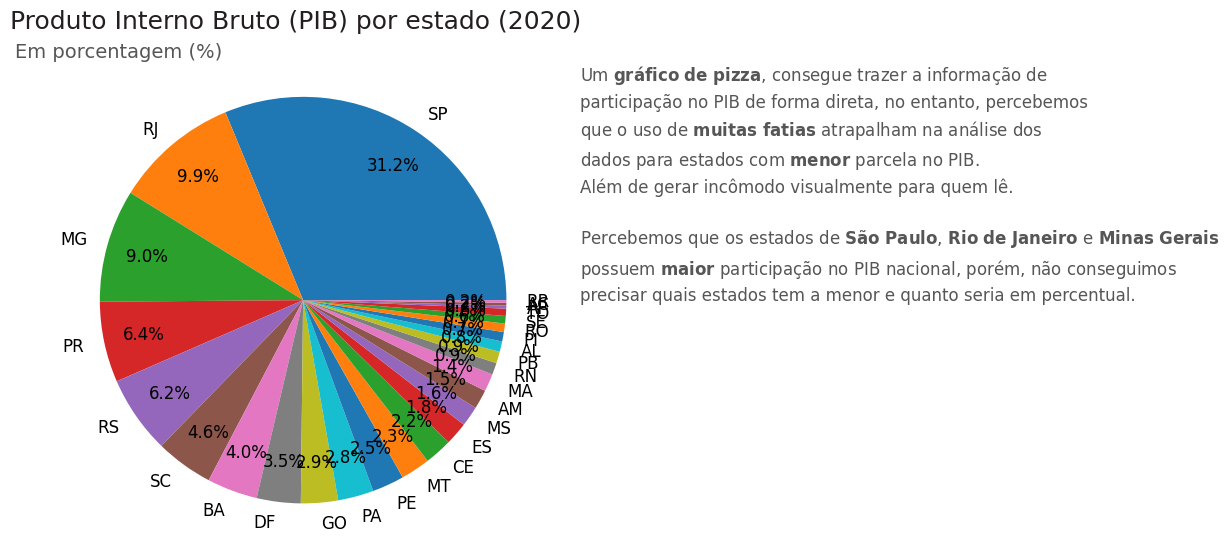

In [6]:
# Importando as bibliotecas
import matplotlib.pyplot as plt
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(6,6))


# Gerando o gráfico de pizza
ax.pie(data = df_pib_2020, x = "pib", labels = df_pib_2020.index, autopct = "%.1f%%",
       radius = 1.1, pctdistance=0.8, textprops={"size":12})

# Personalizando o gráfico
plt.suptitle('Produto Interno Bruto (PIB) por estado (2020)', size=18, color=CINZA1)
plt.title('Em porcentagem (%)', fontsize=14, color=CINZA3, pad = 15, x = 0.1, y = 0.98 )

# Anotando uma conclusão no gráfico
ax.text(1.1, 0.5,
         'Um $\\bf{gráfico\ de\ pizza}$, consegue trazer a informação de\n'
         'participação no PIB de forma direta, no entanto, percebemos\n'
         'que o uso de $\\bf{muitas\ fatias}$ atrapalham na análise dos\n'
         'dados para estados com $\\bf{menor}$ parcela no PIB.\n'
         'Além de gerar incômodo visualmente para quem lê.\n\n'
         'Percebemos que os estados de $\\bf{São\ Paulo}$, $\\bf{Rio\ de\ Janeiro}$ e $\\bf{Minas\ Gerais}$\n'
         'possuem $\\bf{maior}$ participação no PIB nacional, porém, não conseguimos\n'
         'precisar quais estados tem a menor e quanto seria em percentual.',
         fontsize=12,
         linespacing=1.45,
         color=CINZA3, transform= ax.transAxes)

plt.show()

In [7]:
#Grafico de pizza representa um composição estatica

In [8]:
df_pib_2002 = df_pib.query("ano == 2002")[["regiao","pib"]]
df_pib_2020 = df_pib.query("ano == 2020")[["regiao","pib"]]
#groupyby agrupa dados por regiao
df_pib_2002 = df_pib_2002.groupby("regiao").sum().sort_values("pib", ascending=False)
df_pib_2020 = df_pib_2020.groupby("regiao").sum().sort_values("pib", ascending=False)

display(df_pib_2002, df_pib_2020)

,pib
regiao,
Sudeste,854309793369
Sul,241564819092
Nordeste,194847656440
Centro-Oeste,128162640832
Norte,69902366306


,pib
regiao,
Sudeste,3952694729239
Sul,1308147455374
Nordeste,1079331030689
Centro-Oeste,791250735824
Norte,478173048893


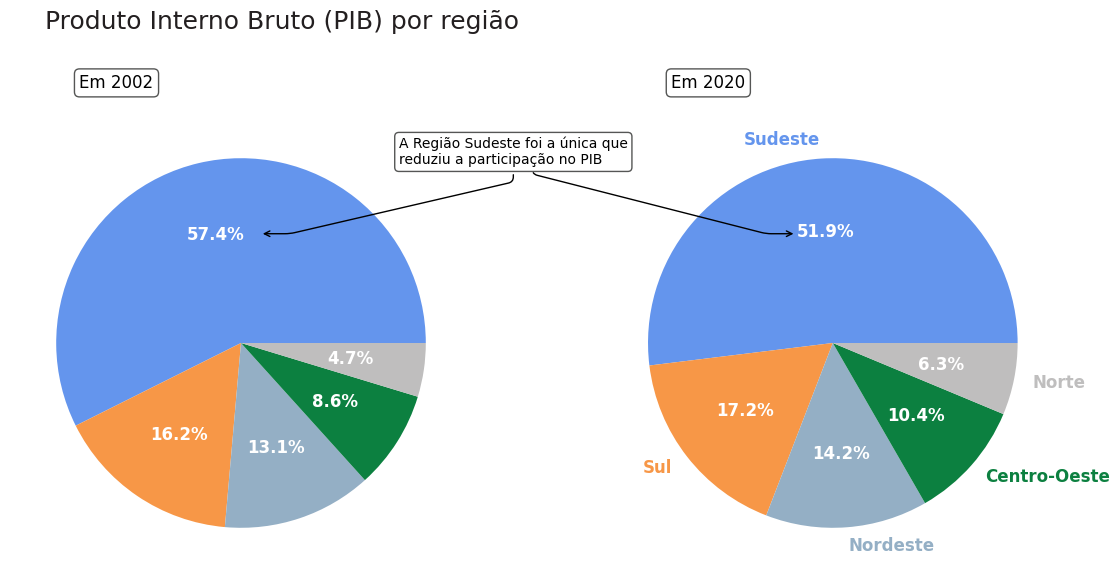

In [17]:
# Importando as bibliotecas
import matplotlib.pyplot as plt
# Área do gráfico e tema da visualização
fig, axs = plt.subplots(1, 2, figsize=(14,6))
# Definindo as cores do gráfico
cores = [AZUL3, LARANJA1, AZUL5 , VERDE1, CINZA5]
# Personalizando o gráfico
plt.suptitle('Produto Interno Bruto (PIB) por região', fontsize=18, color=CINZA1, ha = 'right', x = 0.5, y = 1.05)
# GRÁFICO 1 - PIB de 2002 por região
ptc, text, _ = axs[0].pie(data = df_pib_2002, x = "pib", labels = df_pib_2002.index, autopct="%.1f%%",
                          pctdistance=0.6, textprops={"size": 12, "fontweight":"bold", "color": BRANCO},
                          colors = cores)
# GRÁFICO 2 - PIB de 2020 por região
ptc, text, _ = axs[1].pie(data = df_pib_2020, x = "pib", labels = df_pib_2020.index, autopct="%.1f%%",
                          pctdistance=0.6, textprops={"size": 12, "fontweight":"bold", "color": BRANCO},
                          colors = cores)

# Título do Gráfico 1
axs[0].annotate("Em 2002", xy=(50, 350), size =12, xycoords='axes points',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3))
# Ajustando as cores das regiões relativas as fatias
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())
# Título do Gráfico 2
axs[1].annotate("Em 2020", xy=(50, 350), size =12, xycoords='axes points',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3))
# Ajustando as cores das regiões relativas as fatias
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

axs[0].annotate('A Região Sudeste foi a única que\nreduziu a participação no PIB',
            xy=(180, 245), xycoords='axes points', xytext=(280, 295), textcoords='axes points',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3),
            size=10, arrowprops=dict(arrowstyle="->", fc=CINZA1, connectionstyle="arc,angleA=-90,angleB=0,armA=30,armB=30,rad=5"))
axs[1].annotate('\n\n', xy=(140, 245), xycoords='axes points', xytext=(-50, 295), textcoords='axes points',
            size=10, arrowprops=dict(arrowstyle="->", fc=CINZA1, connectionstyle="arc,angleA=-90,angleB=0,armA=30,armB=-30,rad=5"))

plt.show()

In [18]:
#Grafico de rosca.
#Participação do estado de Minas Gerais no PIB do Brasil no ano de 2020.

# Criando um df com os dados desejados
df_mg_2020 = df_pib.query("ano == 2020")[["sigla_uf", "pib"]]
# Renomeando todos os estados como 'Outros' e mudando da sigla MG para Minas Gerais
df_mg_2020.loc[df_mg_2020["sigla_uf"] == "MG", "sigla_uf"] = "Minas Gerais" # Na minha linha na sigla uf quero que == MG se encontrar altere a sigla uf em Minas Gerais
df_mg_2020.loc[df_mg_2020["sigla_uf"] != "Minas Gerais", "sigla_uf"] = "Outros" #A diferença que vai ser todos que não são Minas Gerais vai ser catalogado como Outros

#Agrupar os dados de "Outros"
df_mg_2020= df_mg_2020.groupby("sigla_uf").sum()
df_mg_2020

,pib
sigla_uf,
Minas Gerais,682786116407
Outros,6926810883612


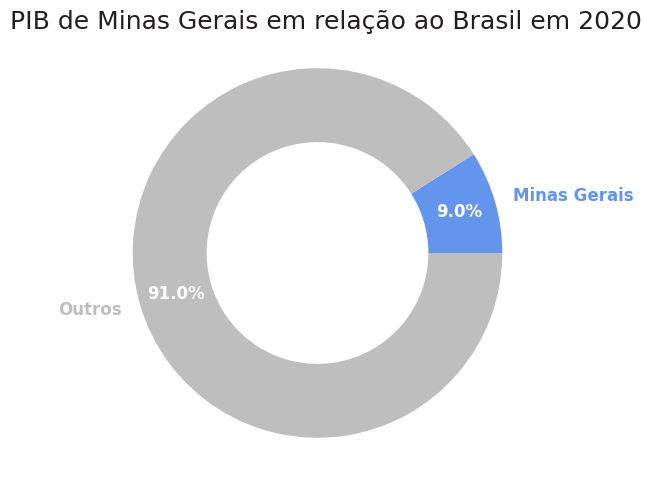

In [22]:
#Criação do grafico baseado no feitos no Projeto antecessor a esse "Comparação e distribuição de dados"
import matplotlib.pyplot as plt

# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(6,6))
# Definindo as cores do gráfico
cores = [AZUL3, CINZA5]
# Personalizando o gráfico
plt.suptitle('PIB de Minas Gerais em relação ao Brasil em 2020', fontsize=18, color=CINZA1, ha = 'left', x = 0, y = 0.9)
# Gerando o gráfico do PIB de 2020 de Minas Gerais em relação a todo Brasil
ptc, text, _ = ax.pie(data = df_mg_2020, x="pib", labels=df_mg_2020.index, autopct = "%.1f%%",
                      startangle = 0, pctdistance = 0.8, wedgeprops=dict(width=0.4), #Diminir representação do grafico wedgeprops
                      textprops=dict(size=12, fontweight="bold", color= BRANCO),
                      colors = cores)
# Ajustando as cores das regiões relativas às fatias
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

plt.show()


treemap é um tipo de visual muito utilizado para mostrar a composição e a hierarquia dos dados usando formas geométricas retangulares coloridas.

In [23]:
# Criando um df com os dados desejados
pib_2020 = df_pib.copy()
pib_2020 = pib_2020.query("ano == 2020")[["regiao", "sigla_uf", "pib"]]

In [24]:
# Ajustando os valores do PIB para bilhões e ordenando pelo pib
pib_2020["pib"] = (pib_2020["pib"] / 1e9).round(0).astype("int64")
pib_2020 = pib_2020.sort_values("pib", ascending= False)

In [25]:
# Gerando uma coluna para a porcentagem da representação de cada Estado no PIB de 2020
pib_2020["pib_%"] = pib_2020["pib"].div(pib_2020["pib"].sum(), axis=0)
pib_2020["pib_%"] = (pib_2020["pib_%"] * 100).round(1)

pib_2020.head()

,regiao,sigla_uf,pib,pib_%
379,Sudeste,SP,2378,31.3
360,Sudeste,RJ,754,9.9
322,Sudeste,MG,683,9.0
398,Sul,PR,488,6.4
436,Sul,RS,471,6.2


In [26]:
# Importando a biblioteca
import plotly.express as px

# Gerando o gráfico de árvore (TREEMAP) para o ano de 2020
fig = px.treemap(pib_2020, path=[px.Constant("Distribuição do PIB"), 'sigla_uf'], values='pib_%',
color='regiao', custom_data=['regiao','pib'], 
title='Distribuição do PIB nos estados brasileiros no ano de 2020 (em bilhões de reais)',
color_discrete_map={'(?)': BRANCO,'Sudeste':AZUL3, 'Sul':LARANJA1, 'Nordeste':AZUL5,
'Centro-Oeste':VERDE1, 'Norte':CINZA5})

# Ajustando o layout do gráfico
fig.update_layout(width=1400, height=600, margin = dict(t=50, l=0, r=0, b=25), font_family = 'DejaVu Sans',
                  font_size=14, font_color= CINZA2, title_font_color= CINZA1, title_font_size=24)

# Ajustando o hovertext
fig.update_traces(marker=dict(cornerradius=3), texttemplate='<b>%{label}</b>',
hovertemplate='<b>Estado:</b> %{label} <br><b>Região</b> = %{customdata[0]} <br>'                                                                                             '<b>PIB</b> = R$ %{customdata[1]} bi (%{value}%)')
fig.show()